# Multiple Integrals

## Reminder of 1D integration and Riemann sums
In one dimension, an integral measures the total amount of some quantity that depends on one variable (usually $x$).  We can interpret this as the area under a curve (treating negative values as giving negative area), but its meaning does not have to be area.  For example, if $f(t)$ is income rate (dollars per day) of a company at time $t$ (measured in days) then the `area' under the curve of $f$ is the total income (in this case the vertical axis is in dollars per day and the horizontal axis is days, so the area has units of dollars).

### Riemann sums
The analytic integration techniques we have learned are very useful for calculating integrals.  However, Riemann sums are important for understanding the physical interpretation of an integral.  When we go to 2 or more dimensions, having this understanding will be very helpful when we try to determine how to set up the terminals for an integral.

Let's consider a function $f(x)$.  We want to know the area under the curve from $x=a$ to $x=b$.  We divide the interval into subintervals with

\begin{align*}
x_0 &= a \\
  x_1 &= x_0 + \Delta x\\
  &\vdots\\
  x_{i+1} &= x_i + \Delta x\\
  & \vdots\\
  x_{N-1} &= b - \Delta x\\
  x_N&=b
\end{align*}
and we approximate the function as constant in each subinterval, equal to $f(x_i)$ and sum up the area under this approximation.

In the figure below, we take $a=1$ and $b=3$.  We see that as $\Delta x$ shrinks, the total white region below the curve and blue region above the curve both shrink to zero, so this sum will approach the area in the small $\Delta x$ limit.  (in fact, halving the step size approximately halves the error).



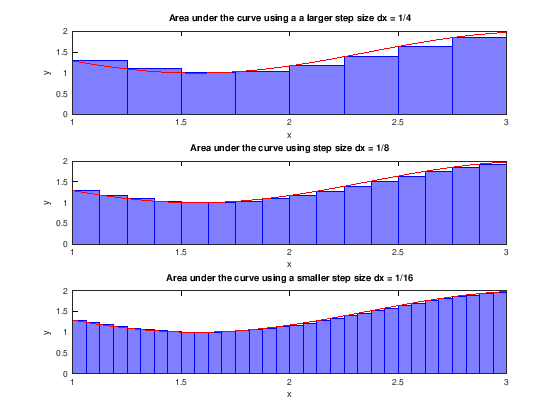

In [3]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.

a=1;
b=3;
dx = 1/4;
x = [a:dx:b];
f = 1+cos(x).^2;



high_res_x = [a:0.01:b];
high_res_f = 1+cos(high_res_x).^2;

subplot(3,1,1);
for index = [1:length(x)-1]
   area (x(index:index+1), [f(index), f(index)], 'FaceColor', 'b', 'FaceAlpha', 0.5, 'EdgeColor', 'b', 'EdgeAlpha', 0.5)
    hold on
end
plot(high_res_x, high_res_f, 'r')
xlabel('x')
ylabel('y')
title('Area under the curve using a a larger step size dx = 1/4')

dx = 1/8;
x = [a:dx:b];
f = 1+cos(x).^2;

subplot(3,1,2);
for index = [1:length(x)-1]
   area (x(index:index+1), [f(index), f(index)], 'FaceColor', 'b', 'FaceAlpha', 0.5, 'EdgeColor', 'b', 'EdgeAlpha', 0.5)
    hold on
end
plot(high_res_x, high_res_f, 'r')
xlabel('x')
ylabel('y')
title('Area under the curve using step size dx = 1/8')

dx = 1/16;
x = [a:dx:b];
f = 1+cos(x).^2;

subplot(3,1,3);
for index = [1:length(x)-1]
   area (x(index:index+1), [f(index), f(index)], 'FaceColor', 'b', 'FaceAlpha', 0.5, 'EdgeColor', 'b', 'EdgeAlpha', 0.5)
    hold on
end
plot(high_res_x, high_res_f, 'r')
xlabel('x')
ylabel('y')
title('Area under the curve using a smaller step size dx = 1/16')


If we take $x_0 = 1$, $x_1 = 1+\Delta x$, $\ldots$, $x_i = 1 + i \Delta x$, $\ldots$, $x_N = 3$, then we can write the area of the rectangles as

$$
\int_1^3 f(x) \, dx \approx \sum_{i=0}^{N-1} f(x_i) \Delta x
$$

We will write this sum in a slightly different manner which will help us avoid having to explicitly include $N$ in the expression.  Once the region is divided up we write it as

$$
\int_1^3 f(x) \, dx \approx \sum_{1\leq x_i < 3} f(x_i) \Delta x
$$
This uses the same values of $x_i$, but it makes it clearer how the terminals of the integral correspond to the limits of the summation.




## 2D integration

In two dimensions an integral again measures the total amount of some quantity, but this time it depends on two variables.  Typically the region we integrate over is not something as simple as an interval like we had for the 1D case.  This will take some more consideration to handle the terminals of our integrals.

SKETCH

Consider the region $S$ bounded between the curves 
$y = x^2-1$ and $y = 3(x^2-1)$.  Both of these curves are $0$ at $x = \pm 1$, and the region of interest occurs between these values of $x$.

Let us imagine that this marks out a region of land where a solar farm will be built.  Due to the slope of the land, we assume that the amount of solar energy collected per unit area is given by a function $f(x,y)$.  We would like to determine the total amount of solar energy to be collected from this entire parcel of land.

To approximate this, we will divide the region into many small rectangles with sides of length $\Delta x$ and $\Delta y$.  Based on the area of a rectangle and the value of the function at one point $(x_*,y_*)$ in the rectangle, we approximate the solar energy collected from the rectangle as $f(x_*, y_*) \Delta x \Delta y$.  If we add up the values for all rectangles in the region, we anticipate that we will get a reasonable approximation to the total of solar energy.  For simplicity, we take $(x_*,y_*)$ to be the bottom left corner of the rectangle.

As this can be thought of as the height $f(x,y)$ (in units of solar energy per unit area) times the area $\Delta x \Delta y$, of each rectangle, we can think of this as calculating the volume under the surface $f(x,y)$ over the region $S$.  We will call this volume $\iint_S f(x,y) \, dS$.

We can write

$$
\iint_S f(x,y) \, dS \approx \sum_{(x_i,y_j) \in S} f(x_i, y_j) \Delta x \Delta y
$$

We look for a systematic way to add up the volumes over each rectangle.  
- We could choose to look at each column in turn and add its values up and then add up these results.
- We could choose to look at each row in turn and add its values up and then add up these results.

By looking at the shape of $S$, you might spot that something awkward could happen in the second case (for $y>-1$).  We will focus initially on the first option.

**Sketch showing division, with $x_i$ and $y_j$ labelled.**

In this case, what we are doing is 

$$
\iint_S f(x,y)  \approx \sum_{-1 \leq x_i < 1} \left[ \sum_{3x_i^2-3 \leq y_j \leq x_i^2-1} f(x,y) \, \Delta y \, \Delta x \right]
$$
By factoring out $\Delta x$ we get:

$$
\iint_S f(x,y) \, dS \approx \sum_{-1 \leq x_i < 1} \left[ \sum_{3x_i^2-3 \leq y_j \leq x_i^2-1} f(x_i,y_j) \, \Delta y \right] \, \Delta x 
$$

We now shrink $\Delta y$ to $0$.  The inner sum becomes $\int_{3x_i^2-3}^{x_i^2-1} f(x_i,y) \, dy$.  So we have

$$
\iint_S f(x,y) \, dS \approx \sum_{-1 \leq x_i < 1} \left[ \int_{3x_i^2-3}^{x_i^2-1} f(x_i,y) \, dy \right] \, \Delta x 
$$
Now taking $\Delta x$ to $0$, we have 

$$
\iint_S f(x,y) \, dS = \int_{-1}^{1} \left[ \int_{3x^2-3}^{x^2-1} f(x,y) \, dy \right] \, dx 
$$
which we often write without the brackets 

$$
\iint_S f(x,y) \, dS = \int_{-1}^{1} \int_{3x^2-3}^{x^2-1} f(x,y) \, dy \, dx 
$$
and we say that in this case $dS = dy \, dx$.

Had we chosen the opposite order of doing our sums (that is, looking at rows) we would have encountered a little more difficulty.

For each $y_j<-1$ it would be reasonable to sum up the volumes from the left-most value of $x$ to the right-most value of $x$.  However, for $y_j>-1$ there would be two separate regions to consider.  

What we will do in this case is divide up the original region $S$ into three subregions:
\begin{align*}
S_1 &= \{ (x,y) \in S| -3< y < -1\}\\
S_2 &= \{ (x,y) \in S| -1 \leq y \leq 0, x<0\}\\
S_3 &= \{ (x,y) \in S| -1 \leq y \leq 0, x>0\}
\end{align*}
and our overall integral becomes

\begin{align*}
\iint_S f(x,y) \, dS &= \iint_{S_1} f(x,y) \, dS_1 + \iint_{S_2} f(x,y) \, dS_2 + \iint_{S_3} f(x,y) \, dS_3\\
&\approx  \quad \sum_{(x_i,y_j)\in S_1} f(x_i,y_j) \, \Delta x \, \Delta y\\
&\qquad + \sum_{(x_i,y_j)\in S_2 }f(x_i,y_j)\, \Delta x \, \Delta y\\
&\qquad  + \sum_{(x_i,y_j) \in S_3} f(x_i,y_j) \, \Delta x \, \Delta y
\end{align*}
To do our sums for each row (that is, keeping $y_j$ fixed, but varying $x_i$) we will need to determine the left and right boundary of each region as a function of $y$.  

The boundaries are the parabolas $y = x^2-1$ and $y= 3x^2-3$.  We rewrite these as

\begin{align*}
y &= x^2-1\\
\Rightarrow y+1 &= x^2\\
\Rightarrow x &= \pm \sqrt{y+1}\\[12pt]
y &= 3x^2-3\\
\Rightarrow y+3 &= 3x^2\\
\Rightarrow \frac{y+3}{3} &= x^2\\
\Rightarrow x &= \pm \sqrt{\frac{y}{3} + 1}
\end{align*}
- For $S_1$, we have $-\sqrt{\frac{y}{3} + 1} \leq x \leq \sqrt{\frac{y}{3} + 1}$.
- For $S_2$, we have $-\sqrt{\frac{y}{3} + 1} \leq x \leq -\sqrt{y+1}$.
- For $S_3$, we have $\sqrt{y + 1} \leq x \leq \sqrt{\frac{y}{3} + 1}$.

So we write our approximate volume as

\begin{align*}
\iint_S f(x,y) \, dS \approx \quad & \sum_{-3 \leq y_j < -1} \left[ \sum_{-\sqrt{\frac{y_j}{3} + 1} \leq x_i < \sqrt{\frac{y_j}{3} + 1}} f(x_i, y_j) \,\Delta x \,\Delta y \right]\\
&+\sum_{-1 \leq y_j<0} \left[ \sum_{-\sqrt{\frac{y_j}{3} + 1} \leq x_i <-\sqrt{y_j+1}}f(x_i,y_j)\,\Delta x \,\Delta y \right]\\
&+  \sum_{-1 \leq y_j < 0} \left[ \sum_{\sqrt{y_j + 1} \leq x_i < \sqrt{\frac{y_j}{3} + 1}} f(x_i, y_j) \,\Delta x \,\Delta y \right]
\end{align*}
Factoring $\Delta y$ out of the inner sums and taking $\Delta x \to 0$ each of the inner sums becomes an integral:

\begin{align*}
\iint_S f(x,y) \, dS \approx \quad & \sum_{-3 \leq y_j < -1} \left[ \int_{-\sqrt{\frac{y_j}{3} + 1}}^{\sqrt{\frac{y_j}{3} + 1}} f(x, y_j) \, dx  \right]\, \Delta y\\
&+\sum_{-1 \leq y_j<0} \left[ \int_{-\sqrt{\frac{y_j}{3} + 1}}^{-\sqrt{y_j+1}}f(x,y_j)\, dx \right]\, \Delta y\\
&+  \sum_{-1 \leq y_j < 0} \left[ \int_{\sqrt{y_j + 1}} ^{\sqrt{\frac{y_j}{3} + 1}} f(x, y_j) \,dx \right]\,\Delta y
\end{align*}
Finally taking $\Delta y \to 0$ gives

\begin{align*}
\iint_S f(x,y) \, dS &= \iint_{S_1} f(x,y) \, dS_1 + \iint_{S_2} f(x,y) \, dS_2 + \iint_{S_3} f(x,y) \, dS_3\\
 & \quad =\int_{-3}^{-1} \int_{-\sqrt{\frac{y}{3} + 1}}^{\sqrt{\frac{y}{3} + 1}} f(x, y) \, dx  \, dy\\
&\qquad+\int_{-1}^{0}  \int_{-\sqrt{\frac{y}{3} + 1}}^{-\sqrt{y+1}}f(x,y)\, dx \, dy\\
&\qquad+  \int_{-1}^{0}  \int_{\sqrt{y + 1}} ^{\sqrt{\frac{y}{3} + 1}} f(x, y) \,dx \, dy
\end{align*}

We can think of 